In [227]:
import pandas as pd
import numpy as np
from scipy.stats import f

import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm



Loại bỏ giá trị ngoại lai

In [228]:
def remove_outliers_iqr(df, col):
    """
    Loại bỏ ngoại lai theo phương pháp IQR cho một biến col
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_clean = df[(df[col] >= lower) & (df[col] <= upper)].copy()

    print("----- LOẠI BỎ NGOẠI LAI -----")
    print(f"Biến: {VAR_LABELS.get(col, col)}")
    print(f"Ngưỡng dưới: {lower:.4f}")
    print(f"Ngưỡng trên: {upper:.4f}")
    print(f"Số quan sát ban đầu: {len(df)}")
    print(f"Số quan sát sau làm sạch: {len(df_clean)}")
    print(f"Số quan sát bị loại: {len(df) - len(df_clean)}\n")

    return df_clean

Đọc bộ dữ liệu

In [229]:
# Đọc dữ liệu
#df = pd.read_csv('Bộ dữ liệu con.csv', encoding='utf-8-sig') # Có biến giả
#df = pd.read_csv('Bộ dữ liệu con(1).csv', encoding='utf-8-sig') # Không có biến giả
df = pd.read_csv('chí.csv', encoding='utf-8-sig') # Không có biến giả



In [230]:
# ===================== BƯỚC 1. XÁC ĐỊNH MÔ HÌNH ======================
print("="*60)
print("BƯỚC 1. XÁC ĐỊNH MÔ HÌNH HỒI QUY")
print("Biến phụ thuộc: Sản lượng lúa (goutput)")
print("="*60, "\n")

BƯỚC 1. XÁC ĐỊNH MÔ HÌNH HỒI QUY
Biến phụ thuộc: Sản lượng lúa (goutput)



BƯỚC 1.5. KHAI BÁO BIẾN

In [231]:
# Có biến giả
"""VAR_LABELS = {
    "size": "Diện tích canh tác (ha)",
    "seed": "Lượng giống (kg)",
    "urea": "Phân urê (kg)",
    "phosphate": "Phân lân (kg)",
    "pesticide": "Thuốc BVTV",
    "hiredlabor": "Lao động thuê",
    "famlabor": "Lao động gia đình",
    "price": "Giá lúa",
    "goutput": "Sản lượng lúa"
}

BINARY_LABELS = {
    "status_o": "Chủ ruộng",
    "status_sh": "Thuê đất",
    "varieties_trad": "Giống truyền thống",
    "varieties_high": "Giống năng suất cao",
    "bimas_y": "Tham gia BIMAS",
    "bimas_no": "Không tham gia BIMAS"
}"""

# Không có biến giả
VAR_LABELS = {
    "size": "Diện tích canh tác (ha)",
    "seed": "Lượng giống sử dụng (kg)",
    "urea": "Lượng phân urê (kg)",
    "phosphate": "Lượng phân lân (kg)",
    "pesticide": "Chi phí thuốc BVTV",

    "pseed": "Giá giống",
    "purea": "Giá phân urê",
    "pphosph": "Giá phân lân",

    "hiredlabor": "Lao động thuê (công)",
    "famlabor": "Lao động gia đình (công)",
    "totlabor": "Tổng lao động (công)",
    "wage": "Tiền công lao động",

    "price": "Giá lúa",
    "goutput": "Sản lượng lúa"
}

BINARY_LABELS = {}

quantitative_vars = list(VAR_LABELS.keys())
binary_vars = list(BINARY_LABELS.keys())

Thống kê mô tả

In [232]:
print("="*60)
print("BƯỚC 2. THỐNG KÊ MÔ TẢ")
print("="*60, "\n")

print("----- BIẾN ĐỊNH LƯỢNG -----")
desc = df[quantitative_vars].describe()
desc = desc.rename(columns=VAR_LABELS)
print(desc, "\n")

print("----- BIẾN NHỊ PHÂN -----")
bin_summary = []
for var, label in BINARY_LABELS.items():
    n = df[var].count()
    count1 = df[var].sum()
    bin_summary.append({
        "Biến": label,
        "Số quan sát": n,
        "Số = 1": count1,
        "Tỷ lệ (%)": round(count1/n*100, 2)
    })

print(pd.DataFrame(bin_summary), "\n")

BƯỚC 2. THỐNG KÊ MÔ TẢ

----- BIẾN ĐỊNH LƯỢNG -----
       Diện tích canh tác (ha)  Lượng giống sử dụng (kg)  Lượng phân urê (kg)  \
count               216.000000                216.000000           216.000000   
mean                  0.406417                 17.268519            94.541667   
std                   0.377471                 15.777881            97.975783   
min                   0.010000                  2.000000             1.000000   
25%                   0.146750                  7.000000            25.000000   
50%                   0.286000                 13.500000            60.000000   
75%                   0.500000                 22.000000           120.000000   
max                   1.945000                115.000000           500.000000   

       Lượng phân lân (kg)  Chi phí thuốc BVTV   Giá giống  Giá phân urê  \
count           216.000000          216.000000  216.000000    216.000000   
mean             38.638889         1007.083333  100.360139     80.

Vẽ đồ thị 

BƯỚC 3. TRỰC QUAN HÓA



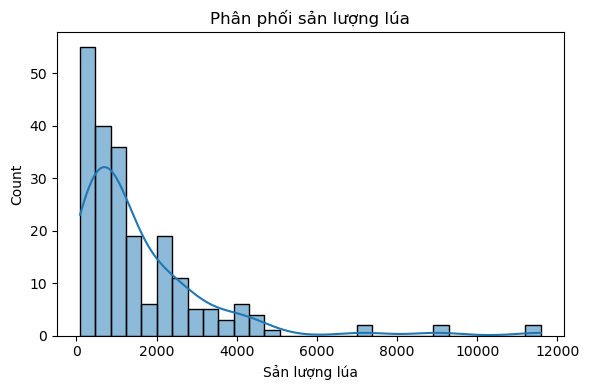

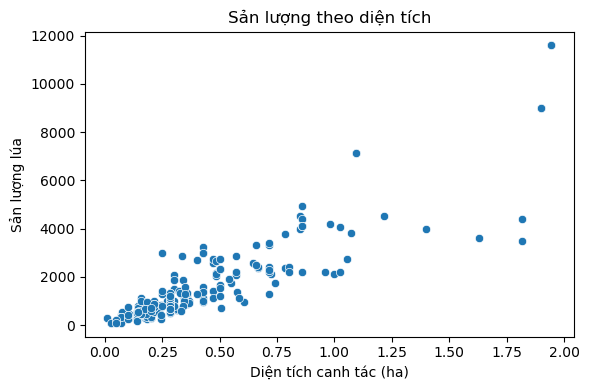

In [233]:
print("="*60)
print("BƯỚC 3. TRỰC QUAN HÓA")
print("="*60, "\n")

# Histogram sản lượng
plt.figure(figsize=(6,4))
sns.histplot(df["goutput"], bins=30, kde=True)
plt.xlabel(VAR_LABELS["goutput"])
plt.title("Phân phối sản lượng lúa")
plt.tight_layout()
plt.savefig("figures/hist_goutput.png")
plt.show()  
plt.close()

# Scatter: sản lượng ~ diện tích 
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["size"], y=df["goutput"]) # sửa size là được
plt.xlabel(VAR_LABELS["size"])
plt.ylabel(VAR_LABELS["goutput"])
plt.title("Sản lượng theo diện tích")
plt.tight_layout()
plt.savefig("figures/scatter_goutput_size.png")
plt.show()  
plt.close()



In [234]:
# Loại bỏ ngoại lai cho biến sản lượng
df = remove_outliers_iqr(df, "goutput")

----- LOẠI BỎ NGOẠI LAI -----
Biến: Sản lượng lúa
Ngưỡng dưới: -2047.5000
Ngưỡng trên: 4632.5000
Số quan sát ban đầu: 216
Số quan sát sau làm sạch: 209
Số quan sát bị loại: 7



OLS - phương pháp bình phương tối thiểu

In [235]:
print("="*60)
print("BƯỚC 5. KIỂM TRA ĐIỀU KIỆN TỒN TẠI NGHIỆM OLS")
print("="*60)

# ------------------------------------------------------------
# 5.1. Xây dựng ma trận thiết kế X
# ------------------------------------------------------------
X_vars = (
    [v for v in VAR_LABELS if v != "goutput"]
    + list(BINARY_LABELS.keys())
)
X_full = sm.add_constant(df[X_vars])

# ------------------------------------------------------------
# 5.2. Kiểm tra hạng và định thức X'X
# ------------------------------------------------------------
XtX = X_full.T @ X_full
det_xtx = np.linalg.det(XtX)
rank_X = np.linalg.matrix_rank(X_full)

print(f"Số biến (kể cả hằng số): {X_full.shape[1]}")
print(f"Hạng của ma trận X: {rank_X}")
print(f"det(X'X) = {det_xtx:.6e}")

if rank_X == X_full.shape[1] and det_xtx != 0:
    print("→ Ma trận X có hạng đầy đủ.")
    print("→ det(X'X) ≠ 0 ⇒ Nghiệm OLS tồn tại duy nhất.\n")
else:
    print("CẢNH BÁO:")
    print("→ Ma trận X không có hạng đầy đủ.")
    print("→ Có thể tồn tại đa cộng tuyến hoàn hảo.")
    print("→ Nghiệm OLS không tồn tại hoặc không duy nhất.\n")



BƯỚC 5. KIỂM TRA ĐIỀU KIỆN TỒN TẠI NGHIỆM OLS
Số biến (kể cả hằng số): 14
Hạng của ma trận X: 14
det(X'X) = 1.776353e+66
→ Ma trận X có hạng đầy đủ.
→ det(X'X) ≠ 0 ⇒ Nghiệm OLS tồn tại duy nhất.



Ước lượng mô hình

In [236]:
print("="*60)
print("BƯỚC 6. ƯỚC LƯỢNG MÔ HÌNH ĐẦY ĐỦ")
print("="*60, "\n")

y = df["goutput"]     # Biến phụ thuộc
model_full = sm.OLS(y, X_full).fit() #
print(model_full.summary(), "\n")

print("----- REGRESSION STATISTICS -----")

reg_stats = pd.DataFrame({
    "Statistic": [
        "Multiple R",
        "R Square",
        "Adjusted R Square",
        "Standard Error",
        "Observations"
    ],
    "Value": [
        np.sqrt(model_full.rsquared),
        model_full.rsquared,
        model_full.rsquared_adj,
        np.sqrt(model_full.scale),
        int(model_full.nobs)
    ]
})

# Hiển thị nhiều chữ số để tránh làm tròn quá sớm
print(reg_stats.round(8))
print()



print("----- ANOVA -----")

anova_table = pd.DataFrame({
    "Source": ["Regression", "Residual", "Total"],
    "df": [
        model_full.df_model,
        model_full.df_resid,
        model_full.df_model + model_full.df_resid
    ],
    "Sum of Squares": [
        model_full.ess, # SSR
        model_full.ssr, # SSE
        model_full.centered_tss # SST
    ],
    "F": [
        model_full.fvalue, 
        "",
        ""
    ],
    "Prob > F": [
        model_full.f_pvalue,
        "",
        ""
    ]
})

print(anova_table.round(6))
print()

print("----- COEFFICIENTS TABLE -----")

coef_table = model_full.summary2().tables[1].round(6)
print(coef_table)
print()

print("Ghi chú:")
print("- Các hệ số được kiểm định bằng kiểm định t riêng phần.")
print("- Kiểm định F đánh giá ý nghĩa thống kê tổng thể của mô hình.\n")



BƯỚC 6. ƯỚC LƯỢNG MÔ HÌNH ĐẦY ĐỦ

                            OLS Regression Results                            
Dep. Variable:                goutput   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     70.08
Date:                Tue, 30 Dec 2025   Prob (F-statistic):           4.10e-66
Time:                        21:41:09   Log-Likelihood:                -1578.1
No. Observations:                 209   AIC:                             3184.
Df Residuals:                     195   BIC:                             3231.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        364.9

Kiểm định và chọn biến

In [237]:
print("="*60)
print("BƯỚC 7. BACKWARD ELIMINATION")
print("="*60, "\n")

def backward_elimination_with_X(X, y, alpha=0.05):
    """
    Backward elimination trả về cả model và ma trận X mới
    """
    Xc = X.copy()
    removed_vars = []  # 🟢 Lưu biến đã loại
    remaining_vars = list(Xc.columns)  # 🟢 Lưu biến còn lại
    
    print("Quá trình backward elimination:")
    print("-" * 50)
    
    while True:
        model = sm.OLS(y, Xc).fit()
        pvals = model.pvalues.drop("const") if "const" in model.pvalues else model.pvalues
        
        if len(pvals) == 0:  # Chỉ còn constant
            break
            
        if pvals.max() > alpha:
            var = pvals.idxmax()
            removed_vars.append(var)
            
            print(f"Vòng {len(removed_vars)}: Loại '{VAR_LABELS.get(var, var)}'")
            print(f"  p-value = {pvals.max():.4f}")
            print(f"  Biến còn lại: {len(Xc.columns)-1}")
            
            Xc = Xc.drop(columns=[var])
            remaining_vars.remove(var)
        else:
            break
    
    # Fit model cuối
    final_model = sm.OLS(y, Xc).fit()
    
    print("-" * 50)
    print(f"Kết thúc: Loại {len(removed_vars)} biến")
    print(f"Còn lại {len(remaining_vars)} biến")
    
    # 🟢 TRẢ VỀ NHIỀU THỨ
    return {
        'model': final_model,          # Mô hình cuối
        'X_final': Xc,                 # Ma trận X cuối
        'removed_vars': removed_vars,  # Biến đã loại
        'final_vars': remaining_vars,  # Biến còn lại
        'final_formula': ' + '.join(remaining_vars)  # Công thức
    }

# Gọi hàm mới
results = backward_elimination_with_X(X_full, y)

# 🟢 Bây giờ bạn có TẤT CẢ:
#final_model = results['model']          # Model như cũ
model_final = results['model']
X_final = results['X_final']            # 🆕 MA TRẬN X MỚI
removed = results['removed_vars']       # 🆕 Biến đã loại
final_vars = results['final_vars']      # 🆕 Biến còn lại

print("\nKẾT QUẢ CHI TIẾT:")
print(f"1. Số biến đã loại: {len(removed)}")
print(f"2. Biến đã loại: {removed}")
print(f"3. Biến còn lại: {final_vars}")
print(f"4. Số cột trong X_final: {X_final.shape[1]}")

# ===================== BƯỚC 7.5. KIỂM ĐỊNH Ý NGHĨA SAU KHI CHỌN BIẾN ======================
print("="*60)
print("BƯỚC 7.5. KIỂM ĐỊNH Ý NGHĨA MÔ HÌNH CUỐI")
print("="*60, "\n")

print("----- REGRESSION STATISTICS (FINAL MODEL) -----")

reg_stats_final = pd.DataFrame({
    "Statistic": [
        "Multiple R",
        "R Square",
        "Adjusted R Square",
        "Standard Error",
        "Observations"
    ],
    "Value": [
        np.sqrt(model_final.rsquared),
        model_final.rsquared,
        model_final.rsquared_adj,
        np.sqrt(model_final.scale),
        int(model_final.nobs)
    ]
})

print(reg_stats_final.round(8))
print()



print("----- ANOVA (FINAL MODEL) -----")

anova_final = pd.DataFrame({
    "Source": ["Regression", "Residual", "Total"],
    "df": [
        model_final.df_model,
        model_final.df_resid,
        model_final.df_model + model_final.df_resid
    ],
    "Sum of Squares": [
        model_final.ess,          # SSR
        model_final.ssr,          # SSE
        model_final.centered_tss  # SST
    ],
    "F": [
        model_final.fvalue,
        "",
        ""
    ],
    "Prob > F": [
        model_final.f_pvalue,
        "",
        ""
    ]
})

print(anova_final.round(6))
print()


print("----- COEFFICIENTS (FINAL MODEL) -----")
print(model_final.summary2().tables[1].round(6))
print()

print("Ghi chú:")
print("- Các hệ số được kiểm định bằng kiểm định t riêng phần.")
print("- Kiểm định F đánh giá ý nghĩa thống kê tổng thể của mô hình.\n")

compare = pd.DataFrame({
    "Mô hình": ["Ban đầu", "Sau backward"],
    "Số biến": [X_full.shape[1]-1, X_final.shape[1]-1],
    "R²": [model_full.rsquared, model_final.rsquared],
    "Adj R²": [model_full.rsquared_adj, model_final.rsquared_adj]
})

print(compare.round(4))



BƯỚC 7. BACKWARD ELIMINATION

Quá trình backward elimination:
--------------------------------------------------
Vòng 1: Loại 'Lượng phân urê (kg)'
  p-value = 0.6014
  Biến còn lại: 13
Vòng 2: Loại 'Lượng giống sử dụng (kg)'
  p-value = 0.6221
  Biến còn lại: 12
Vòng 3: Loại 'Lao động thuê (công)'
  p-value = 0.5232
  Biến còn lại: 11
Vòng 4: Loại 'Giá phân lân'
  p-value = 0.4528
  Biến còn lại: 10
Vòng 5: Loại 'Giá phân urê'
  p-value = 0.6454
  Biến còn lại: 9
Vòng 6: Loại 'Giá giống'
  p-value = 0.3956
  Biến còn lại: 8
--------------------------------------------------
Kết thúc: Loại 6 biến
Còn lại 8 biến

KẾT QUẢ CHI TIẾT:
1. Số biến đã loại: 6
2. Biến đã loại: ['urea', 'seed', 'hiredlabor', 'pphosph', 'purea', 'pseed']
3. Biến còn lại: ['const', 'size', 'phosphate', 'pesticide', 'famlabor', 'totlabor', 'wage', 'price']
4. Số cột trong X_final: 8
BƯỚC 7.5. KIỂM ĐỊNH Ý NGHĨA MÔ HÌNH CUỐI

----- REGRESSION STATISTICS (FINAL MODEL) -----
           Statistic       Value
0         M

Kiểm định ý nghĩa của hồi quy

In [238]:
print("----- KIỂM ĐỊNH F (Ý NGHĨA HỒI QUY TỔNG THỂ) -----")

print("\nGiả thuyết kiểm định:")
print("H₀: Tất cả các hệ số hồi quy riêng (trừ hằng số) đều bằng 0")
print("H₁: Tồn tại ít nhất một hệ số khác 0\n")

# Lấy các đại lượng từ model_final
SSR = model_final.ess                 # Sum of Squares Regression
SSE = model_final.ssr                 # Sum of Squares Error
SST = model_final.centered_tss        # Total Sum of Squares

R2  = model_final.rsquared
R2_adj = model_final.rsquared_adj

k = int(model_final.df_model)         # số biến độc lập (không tính const)
df_resid = int(model_final.df_resid)  # n - k - 1
n = int(model_final.nobs)             # số quan sát

F_stat = model_final.fvalue
p_value_F = model_final.f_pvalue
alpha = 0.05

# In kết quả
print(f"Số quan sát (n)                 = {n}")
print(f"Số biến độc lập (k)             = {k}")
print(f"Bậc tự do phần dư (n - k - 1)   = {df_resid}\n")

print(f"SSR (Sum of Squares Regression) = {SSR:.6f}")
print(f"SSE (Sum of Squares Error)      = {SSE:.6f}")
print(f"SST (Total Sum of Squares)      = {SST:.6f}\n")

print(f"R-squared                       = {R2:.6f}")
print(f"Adjusted R-squared              = {R2_adj:.6f}\n")

print(f"F-statistic = {F_stat:.4f}")
print(f"p-value     = {p_value_F:.6f}")

if p_value_F < alpha:
    print("→ Bác bỏ H₀: Mô hình hồi quy có ý nghĩa thống kê tổng thể.")
else:
    print("→ Không bác bỏ H₀: Mô hình không có ý nghĩa thống kê.")



----- KIỂM ĐỊNH F (Ý NGHĨA HỒI QUY TỔNG THỂ) -----

Giả thuyết kiểm định:
H₀: Tất cả các hệ số hồi quy riêng (trừ hằng số) đều bằng 0
H₁: Tồn tại ít nhất một hệ số khác 0

Số quan sát (n)                 = 209
Số biến độc lập (k)             = 7
Bậc tự do phần dư (n - k - 1)   = 201

SSR (Sum of Squares Regression) = 206347137.685443
SSE (Sum of Squares Error)      = 44832595.051399
SST (Total Sum of Squares)      = 251179732.736842

R-squared                       = 0.821512
Adjusted R-squared              = 0.815296

F-statistic = 132.1608
p-value     = 0.000000
→ Bác bỏ H₀: Mô hình hồi quy có ý nghĩa thống kê tổng thể.


Vẽ biểu đồ sau khi loại bỏ biến

Q–Q PLOT PHẦN DƯ (KIỂM ĐỊNH PHÂN PHỐI CHUẨN)

<Figure size 600x400 with 0 Axes>

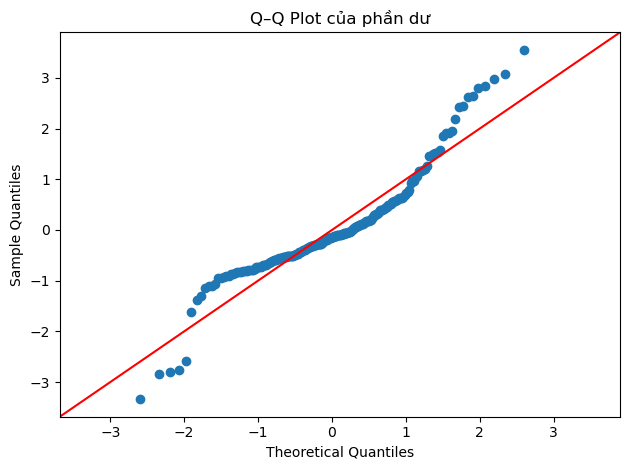

In [239]:
resid = model_final.resid
fitted = model_final.fittedvalues

# Q-Q plot phần dư
plt.figure(figsize=(6, 4))
sm.qqplot(resid, line="45", fit=True)
plt.title("Q–Q Plot của phần dư")
plt.tight_layout()
plt.savefig("figures/qqplot_residuals.png")
plt.show() 
plt.close()


BOXPLOT PHẦN DƯ (PHÁT HIỆN OUTLIER)

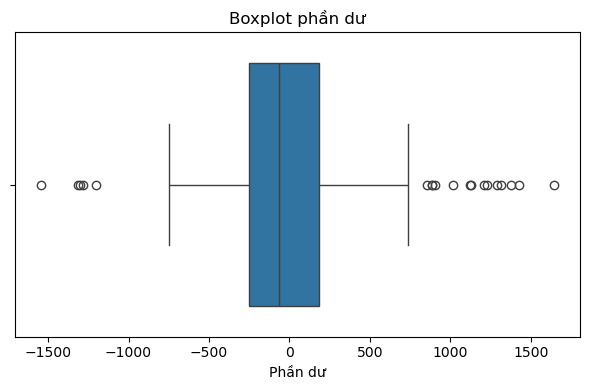

In [240]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=resid)
plt.xlabel("Phần dư")
plt.title("Boxplot phần dư")
plt.tight_layout()
plt.savefig("figures/boxplot_residuals.png")
plt.show()
plt.close()


SCATTER PLOT: PHẦN DƯ – GIÁ TRỊ DỰ ĐOÁN

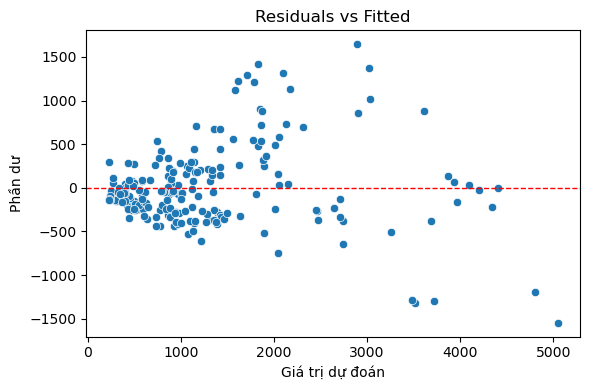

In [241]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=fitted, y=resid)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.xlabel("Giá trị dự đoán")
plt.ylabel("Phần dư")
plt.title("Residuals vs Fitted")
plt.tight_layout()
plt.savefig("figures/residuals_vs_fitted.png")
plt.show()
plt.close()


HISTOGRAM PHẦN DƯ (PHÂN PHỐI)

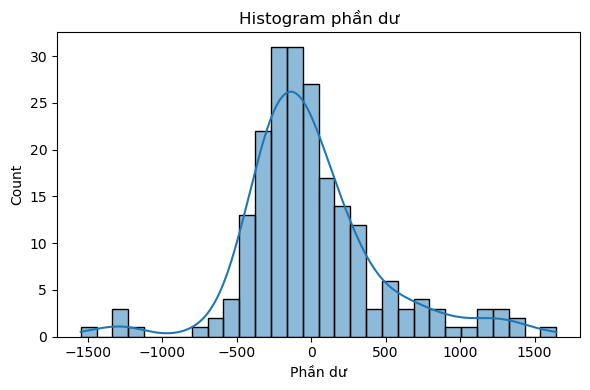

In [242]:
plt.figure(figsize=(6, 4))
sns.histplot(resid, bins=30, kde=True)
plt.xlabel("Phần dư")
plt.title("Histogram phần dư")
plt.tight_layout()
plt.savefig("figures/hist_residuals.png")
plt.show()
plt.close()


KIỂM ĐỊNH t – Ý NGHĨA HỆ SỐ HỒI QUY RIÊNG

In [243]:
print("----- KIỂM ĐỊNH t (Ý NGHĨA HỆ SỐ HỒI QUY RIÊNG) -----")

print("Giả thuyết kiểm định t:")
print("H₀: βᵢ = 0  (biến không ảnh hưởng đến sản lượng)")
print("H₁: βᵢ ≠ 0  (biến có ảnh hưởng đến sản lượng)\n")

# Lấy bảng hệ số từ mô hình CUỐI
coef_table_final = model_final.summary2().tables[1].round(6)
print(coef_table_final, "\n")

print("KẾT LUẬN KIỂM ĐỊNH t CHO TỪNG BIẾN:")

for var in coef_table_final.index:
    if var == "const":
        continue

    coef = coef_table_final.loc[var, "Coef."]
    pval = coef_table_final.loc[var, "P>|t|"]
    ci_low = coef_table_final.loc[var, "[0.025"]
    ci_high = coef_table_final.loc[var, "0.975]"]

    label = VAR_LABELS.get(var, var)

    print(f"- {label}:")
    print(f"  Hệ số chặn = {coef:.6f}")
    print(f"  p-value         = {pval:.6f}")
    print(f"  CI 95%          = [{ci_low:.6f}, {ci_high:.6f}]")

    if pval < alpha:
        print("  → Bác bỏ H₀: Hệ số có ý nghĩa thống kê.\n")
    else:
        print("  → Không bác bỏ H₀: Hệ số không có ý nghĩa thống kê.\n")




----- KIỂM ĐỊNH t (Ý NGHĨA HỆ SỐ HỒI QUY RIÊNG) -----
Giả thuyết kiểm định t:
H₀: βᵢ = 0  (biến không ảnh hưởng đến sản lượng)
H₁: βᵢ ≠ 0  (biến có ảnh hưởng đến sản lượng)

                 Coef.    Std.Err.         t     P>|t|       [0.025  \
const       513.541111  172.690709  2.973762  0.003302   173.023268   
size       1492.880035  222.811143  6.700204  0.000000  1053.532889   
phosphate     6.979097    1.445554  4.827973  0.000003     4.128700   
pesticide     0.029387    0.013345  2.202034  0.028800     0.003072   
famlabor     -1.359831    0.320400 -4.244172  0.000033    -1.991607   
totlabor      1.142460    0.224120  5.097529  0.000001     0.700531   
wage          7.452072    2.081294  3.580500  0.000430     3.348101   
price       -10.000364    3.366762 -2.970321  0.003337   -16.639068   

                0.975]  
const       854.058955  
size       1932.227181  
phosphate     9.829494  
pesticide     0.055701  
famlabor     -0.728055  
totlabor      1.584389  
wage       

In [244]:
print("="*60)
print("PHƯƠNG TRÌNH HỒI QUY TUYẾN TÍNH CUỐI CÙNG")
print("="*60)

# Lấy hệ số ước lượng
params = model_final.params

equation = "Y = "

# Hằng số
equation += f"{params['const']:.4f}"

# Các biến giải thích
for var in params.index:
    if var == "const":
        continue

    coef = params[var]
    label = VAR_LABELS.get(var, var)

    if coef >= 0:
        equation += f" + {coef:.4f}·{label}"
    else:
        equation += f" - {abs(coef):.4f}·{label}"

equation += " + ε"

print(equation)
print("\nTrong đó:")
print("- Y: Sản lượng lúa (goutput)")
print("- ε: Sai số ngẫu nhiên")


PHƯƠNG TRÌNH HỒI QUY TUYẾN TÍNH CUỐI CÙNG
Y = 513.5411 + 1492.8800·Diện tích canh tác (ha) + 6.9791·Lượng phân lân (kg) + 0.0294·Chi phí thuốc BVTV - 1.3598·Lao động gia đình (công) + 1.1425·Tổng lao động (công) + 7.4521·Tiền công lao động - 10.0004·Giá lúa + ε

Trong đó:
- Y: Sản lượng lúa (goutput)
- ε: Sai số ngẫu nhiên
